# Logistic Regression

### Imports

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
IN_PATH = 'data/'


X_train, X_test, y_train, y_test = pd.read_csv(f'{IN_PATH}X_train.csv'), pd.read_csv(f'{IN_PATH}X_test.csv'), pd.read_csv(f'{IN_PATH}y_train.csv'), pd.read_csv(f'{IN_PATH}y_test.csv')
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
predictors_dropped = ["points"]
X_train = X_train.drop(columns=predictors_dropped)
X_test = X_test.drop(columns=predictors_dropped)

### Define pipeline

In [178]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=500, random_state=42))
])

### Define hyperparameter grid


In [179]:
param_grid = {
    "logreg__C": [0.01, 0.1, 1, 10, 100],  
    "logreg__penalty": ["l2"],
    "logreg__solver": ["lbfgs"]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best hyperparameters:", grid.best_params_)


Best hyperparameters: {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}


### Final Predictions

In [180]:
y_pred = grid.predict(X_test)


print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))




=== Confusion Matrix ===
[[208  16]
 [ 25 151]]

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.89      0.93      0.91       224
        True       0.90      0.86      0.88       176

    accuracy                           0.90       400
   macro avg       0.90      0.89      0.90       400
weighted avg       0.90      0.90      0.90       400



### Plots

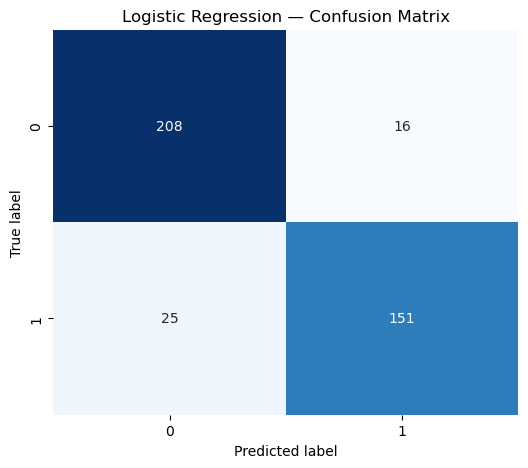

In [181]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues",
            fmt="d", cbar=False)
plt.title("Logistic Regression — Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


### ROC Curve

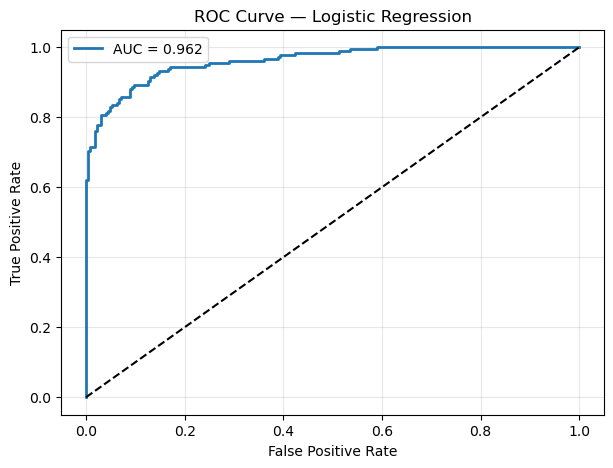

In [182]:
y_proba = grid.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, linewidth=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Run cross-validation (GridSearchCV)


In [183]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=500,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l2'],
                         'logreg__solver': ['lbfgs']},
             scoring='accuracy')

### Evaluate best model


In [184]:
y_pred = grid.predict(X_test)

print("Best hyperparameters:", grid.best_params_)

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

Best hyperparameters: {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}

--- Confusion Matrix ---
[[208  16]
 [ 25 151]]

--- Classification Report ---
              precision    recall  f1-score   support

       False       0.89      0.93      0.91       224
        True       0.90      0.86      0.88       176

    accuracy                           0.90       400
   macro avg       0.90      0.89      0.90       400
weighted avg       0.90      0.90      0.90       400



### Extract coefficients

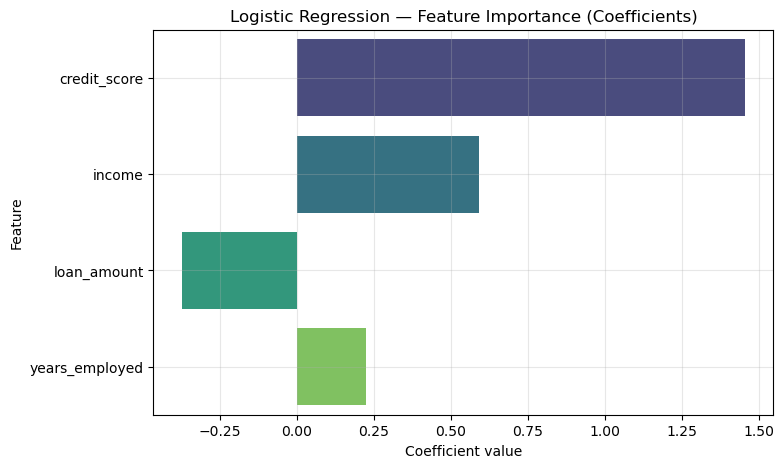

In [185]:
best_model = grid.best_estimator_
coefs = best_model.named_steps["logreg"].coef_[0]
feature_names = X_train.columns

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs
}).sort_values("coefficient", key=abs, ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=coef_df, x="coefficient", y="feature", palette="viridis")
plt.title("Logistic Regression — Feature Importance (Coefficients)")
plt.xlabel("Coefficient value")
plt.ylabel("Feature")
plt.grid(alpha=0.3)
plt.show()
